## Assessing the Implications of Using FUMA instead of just MAGMA on scDRS results

In [2]:
library(data.table)
library(ggplot2)
library(cowplot)
library(tidyverse)
library(ggnewscale)

In [35]:
exp_mac <- c("M-0: MERTK+ SELENOP+ LYVE1+"="#756bb1",
                 "M-1: MERTK+ SELENOP+ LYVE1-"="#756bb1", 
                 "M-2: MERTK+ S100A8+"="#756bb1", 
                 "M-3: MERTK+ HBEGF+"="#756bb1", 
                 "M-4: SPP1+"="#bcbddc", 
                 "M-5: C1QA+"="white",
                 "M-6: STAT1+ CXCL10+"="#756bb1", 
                 "M-7: IL1B+ FCN1+ HBEGF+"="#756bb1", 
                 "M-8: PLCG2+"="white", 
                 "M-9: DC3"="white", 
                 "M-10: DC2"="white", 
                 "M-11: CD16+/DC4"="white", 
                 "M-12: DC1"="white",
                 "M-13: pDC"="white", 
                 "M-14: LAMP3+"="white")
exp_fib <- c('F-0: PRG4+ CLIC5+ lining'='white',
                   'F-1: PRG4+ lining'='white', 
                   'F-2: CD34+ sublining'='#756bb1', 
                   'F-3: POSTN+ sublining'='white', 
                   'F-4: DKK3+ sublining'='white', 
                   'F-5: CD74-hi sublining'='white', 
                   'F-6: CXCL12+ SFRP1+ sublining'='white', 
                   'F-7: NOTCH3+ sublining'='#756bb1', 
                   'F-8: RSPO3+ intermediate'='white', 
                   'Mu-0: Mural'='white')

exp_b <- c("B-0: CD24+CD27+CD11b+\n switched memory" = "#756bb1", 
                   "B-1: CD24++CD27+IgM+\n unswitched memory" = "white", 
                   "B-2: IgM+IgD+TCL1A+ naive" = "white", 
                   "B-3: IgM+IgD+CD1c+ MZ-like" = "white",
                   "B-4: AICDA+BCL6+ GC-like" = "white",
                   "B-5: CD11c+LAMP1+ ABC" = "#756bb1",
                   "B-6: IgM+ plasma" = "white", 
                   "B-7: HLA-DR+IgG+ plasmablast" = "white",
                   "B-8: IgG1+IgG3+ plasma" = "white"
                   )

exp_t <- c("T-0: CD4+ IL7R+ memory" = "#bcbddc", "T-1: CD4+ CD161+ memory" = "#bcbddc", 
                 "T-2: CD4+ IL7R+CCR5+ memory" = "#bcbddc", "T-3: CD4+ Tfh/Tph" = "#756bb1", 
                 "T-4: CD4+ naive" = "white", "T-5: CD4+ GZMK+ memory" = "#bcbddc", 
                 "T-6: CD4+ memory" = "#bcbddc", "T-7: CD4+ Tph" = "#756bb1", 
                 "T-8: CD4+ CD25-high Treg" = "#756bb1", "T-9: CD4+ CD25-low Treg" = "#756bb1", 
                 "T-10: CD4+ OX40+NR3C1+" = "white", "T-11: CD4+ CD146+ memory" = "#bcbddc", 
                 "T-12: CD4+ GNLY+" = "white", "T-13: CD8+ GZMK/B+ memory" = "#756bb1", 
                 "T-14: CD8+ GZMK+ memory" = "#756bb1", "T-15: CD8+ GZMB+/TEMRA" = "white",
                 "T-16: CD8+ CD45ROlow/naive" = "white", "T-17: CD8+ activated/NK-like" = "white",
                 "T-18: Proliferating" = "white", "T-19: MT-high (low quality)" = "white", 
                 "T-20: CD38+" = "white", "T-21: Innate-like" = "white", 
                 "T-22: Vdelta1" = "white", "T-23: Vdelta2" = "white")

exp_nk <- c("NK-0: CD56dim CD16+ IFNG-" = "#bcbddc", 
                    "NK-1: CD56dim CD16+ IFNG+CD160+" = "#bcbddc", 
                    "NK-2: CD56dim CD16+ IFNG+CD160-" = "#bcbddc",
                    "NK-3: CD56dim CD16+ GZMB-" = "#bcbddc", 
                    "NK-4: CD56bright CD16- GZMA+CD160+" = "#bcbddc", 
                    "NK-5: CD56bright CD16- GZMA+CD69+" = "#bcbddc", 
                    "NK-6: CD56bright CD16- GNLY+" = "#bcbddc", 
                    "NK-7: CD56bright CD16- GNLY+CD69+" = "#bcbddc", 
                    "NK-8: CD56bright CD16- IFN response" = "#bcbddc",
                    "NK-9: MT-high" = "white", 
                    "NK-10: PCNA+ Proliferating" = "white",
                    "NK-11: MKI67+ Proliferating" = "white", 
                    "NK-12: IL7R+ ILC" = "white", 
                    "NK-13: IL7R+CD161+ ILC" = "white")

exp_end <- c("E-0: SPARC+ capillary" = "white", 
                     "E-1: LIFR+ venular" = "white",
                     "E-2: ICAM1+ venular" = "white", 
                     "E-3: NOTCH4+ arteriolar" = "white", 
                     "E-4: Lymphatic" = "white")

exp_colors_ra <- c(exp_t, exp_nk, 
                 exp_mac, exp_b,
                exp_fib, exp_end)
meta_colors1 <- list(exp_end, exp_fib, 
                     exp_b, exp_mac,
                     exp_nk, exp_t)

## 1. Cell Cluster scores

In [36]:
# read in the macro & micro 10kb
## New 10 & 5035
output_dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/output/SCDRS/RA_53/"
micro_5035 <- fread(paste0(output_dir, "RA.scdrs_group.cell_type_micro"))
micro_10 <- fread("~/Desktop/SCRNA-GWAS-Benchmarking/output/scDRS_Win/RA_10kb.scdrs_group.cell_type")
micro_100 <- fread("~/Desktop/SCRNA-GWAS-Benchmarking/output/scDRS_Win/RA_100kb.scdrs_group.cell_type")
# Fuma
down_dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/output/SCDRS/white_only/SCDRS_comp/"
clusters_fuma <- fread(paste0(down_dir, "RA.scdrs_group.cell_type_micro_fuma_onlyinexp_051223"))
clusters_fuma_mag <- fread(paste0(down_dir, "RA.scdrs_group.cell_type_micro_fumagma_onlyinexp_051223"))



In [37]:
## Use names better for visualization
add_spaces_dict <- c("B-0: CD24+CD27+CD11b+\n switched memory", 
                    "B-1: CD24++CD27+IgM+\n unswitched memory")
names(add_spaces_dict) <- c("B-0: CD24+CD27+CD11b+ switched memory", "B-1: CD24++CD27+IgM+ unswitched memory")
micro_10$group2 <- as.character(micro_10$group)
micro_100$group2 <- as.character(micro_100$group)
clusters_fuma$group2 <- as.character(clusters_fuma$group)
clusters_fuma_mag$group2 <- as.character(clusters_fuma_mag$group)
for (cell_group in names(add_spaces_dict)) {
    print(add_spaces_dict[cell_group])
    clusters_fuma[clusters_fuma$group == cell_group,]$group2 <- add_spaces_dict[cell_group]
    clusters_fuma_mag[clusters_fuma_mag$group == cell_group,]$group2 <- add_spaces_dict[cell_group]
    micro_10[micro_10$group == cell_group,]$group2 <- add_spaces_dict[cell_group]
    micro_100[micro_100$group == cell_group,]$group2 <- add_spaces_dict[cell_group]
    }

    B-0: CD24+CD27+CD11b+ switched memory 
"B-0: CD24+CD27+CD11b+\n switched memory" 
    B-1: CD24++CD27+IgM+ unswitched memory 
"B-1: CD24++CD27+IgM+\n unswitched memory" 


In [38]:
# get ranked cell clusters according to 5035
ranked_cell_clusters <- c()
for (cell_type in meta_colors1) {
    # get the ranked cells in that group
    data <- micro_10[micro_10$group2 %in% names(cell_type),]
    data <- data[order(abs(assoc_mcz)),]
    # now add the ranked cells to a list
    ranked_cell_clusters <- c(ranked_cell_clusters, data$group2)
    } 
ranked_cell_clusters

[1] "E-2: ICAM1+ venular"                     
 [2] "E-4: Lymphatic"                          
 [3] "E-0: SPARC+ capillary"                   
 [4] "E-3: NOTCH4+ arteriolar"                 
 [5] "E-1: LIFR+ venular"                      
 [6] "F-3: POSTN+ sublining"                   
 [7] "Mu-0: Mural"                             
 [8] "F-0: PRG4+ CLIC5+ lining"                
 [9] "F-4: DKK3+ sublining"                    
[10] "F-1: PRG4+ lining"                       
[11] "F-5: CD74-hi sublining"                  
[12] "F-7: NOTCH3+ sublining"                  
[13] "F-2: CD34+ sublining"                    
[14] "F-8: RSPO3+ intermediate"                
[15] "F-6: CXCL12+ SFRP1+ sublining"           
[16] "B-7: HLA-DR+IgG+ plasmablast"            
[17] "B-6: IgM+ plasma"                        
[18] "B-2: IgM+IgD+TCL1A+ naive"               
[19] "B-8: IgG1+IgG3+ plasma"                  
[20] "B-1: CD24++CD27+IgM+\n unswitched memory"
[21] "B-3: IgM+IgD+CD1c+ MZ-like"              
[22] "B-0: CD24+CD27+CD11b+\n switched memory" 
[23] "B-4: AICDA+BCL6+ GC-like"                
[24] "B-5: CD11c+LAMP1+ ABC"                   
[25] "M-7: IL1B+ FCN1+ HBEGF+"                 
[26] "M-13: pDC"                               
[27] "M-11: CD16+/DC4"                         
[28] "M-5: C1QA+"                              
[29] "M-8: PLCG2+"                             
[30] "M-6: STAT1+ CXCL10+"                     
[31] "M-9: DC3"                                
[32] "M-4: SPP1+"                              
[33] "M-10: DC2"                               
[34] "M-2: MERTK+ S100A8+"                     
[35] "M-12: DC1"                               
[36] "M-14: LAMP3+"                            
[37] "M-0: MERTK+ SELENOP+ LYVE1+"             
[38] "M-3: MERTK+ HBEGF+"                      
[39] "M-1: MERTK+ SELENOP+ LYVE1-"             
[40] "NK-8: CD56bright CD16- IFN response"     
[41] "NK-9: MT-high"                           
[42] "NK-11: MKI67+ Proliferating"             
[43] "NK-3: CD56dim CD16+ GZMB-"               
[44] "NK-4: CD56bright CD16- GZMA+CD160+"      
[45] "NK-2: CD56dim CD16+ IFNG+CD160-"         
[46] "NK-6: CD56bright CD16- GNLY+"            
[47] "NK-12: IL7R+ ILC"                        
[48] "NK-0: CD56dim CD16+ IFNG-"               
[49] "NK-1: CD56dim CD16+ IFNG+CD160+"         
[50] "NK-5: CD56bright CD16- GZMA+CD69+"       
[51] "NK-7: CD56bright CD16- GNLY+CD69+"       
[52] "NK-10: PCNA+ Proliferating"              
[53] "NK-13: IL7R+CD161+ ILC"                  
[54] "T-19: MT-high (low quality)"             
[55] "T-22: Vdelta1"                           
[56] "T-12: CD4+ GNLY+"                        
[57] "T-23: Vdelta2"                           
[58] "T-15: CD8+ GZMB+/TEMRA"                  
[59] "T-14: CD8+ GZMK+ memory"                 
[60] "T-16: CD8+ CD45ROlow/naive"              
[61] "T-4: CD4+ naive"                         
[62] "T-5: CD4+ GZMK+ memory"                  
[63] "T-21: Innate-like"                       
[64] "T-17: CD8+ activated/NK-like"            
[65] "T-13: CD8+ GZMK/B+ memory"               
[66] "T-9: CD4+ CD25-low Treg"                 
[67] "T-0: CD4+ IL7R+ memory"                  
[68] "T-2: CD4+ IL7R+CCR5+ memory"             
[69] "T-1: CD4+ CD161+ memory"                 
[70] "T-3: CD4+ Tfh/Tph"                       
[71] "T-6: CD4+ memory"                        
[72] "T-18: Proliferating"                     
[73] "T-7: CD4+ Tph"                           
[74] "T-10: CD4+ OX40+NR3C1+"                  
[75] "T-11: CD4+ CD146+ memory"                
[76] "T-20: CD38+"                             
[77] "T-8: CD4+ CD25-high Treg"

In [39]:
setdiff(micro_10$group2, ranked_cell_clusters)
setdiff(ranked_cell_clusters, micro_10$group2)

character(0)

character(0)

In [40]:
# Get the ranks of z scores
micro_10 <- micro_10[order(-abs(micro_10$assoc_mcz)),]
micro_10$rank_assoc_mcz <- seq(1, nrow(micro_10))
micro_100 <- micro_100[order(-abs(micro_100$assoc_mcz)),]
micro_100$rank_assoc_mcz <- seq(1, nrow(micro_100))
clusters_fuma <- clusters_fuma[order(-abs(clusters_fuma$assoc_mcz)),]
clusters_fuma$rank_assoc_mcz <- seq(1, nrow(clusters_fuma))
clusters_fuma_mag <- clusters_fuma_mag[order(-abs(clusters_fuma_mag$assoc_mcz)),]
clusters_fuma_mag$rank_assoc_mcz <- seq(1, nrow(clusters_fuma_mag))

### Graph Cell Types

In [14]:
-.1225 - .1525

[1] -0.275

FUMA FUMA-MAG 10kb 100kb

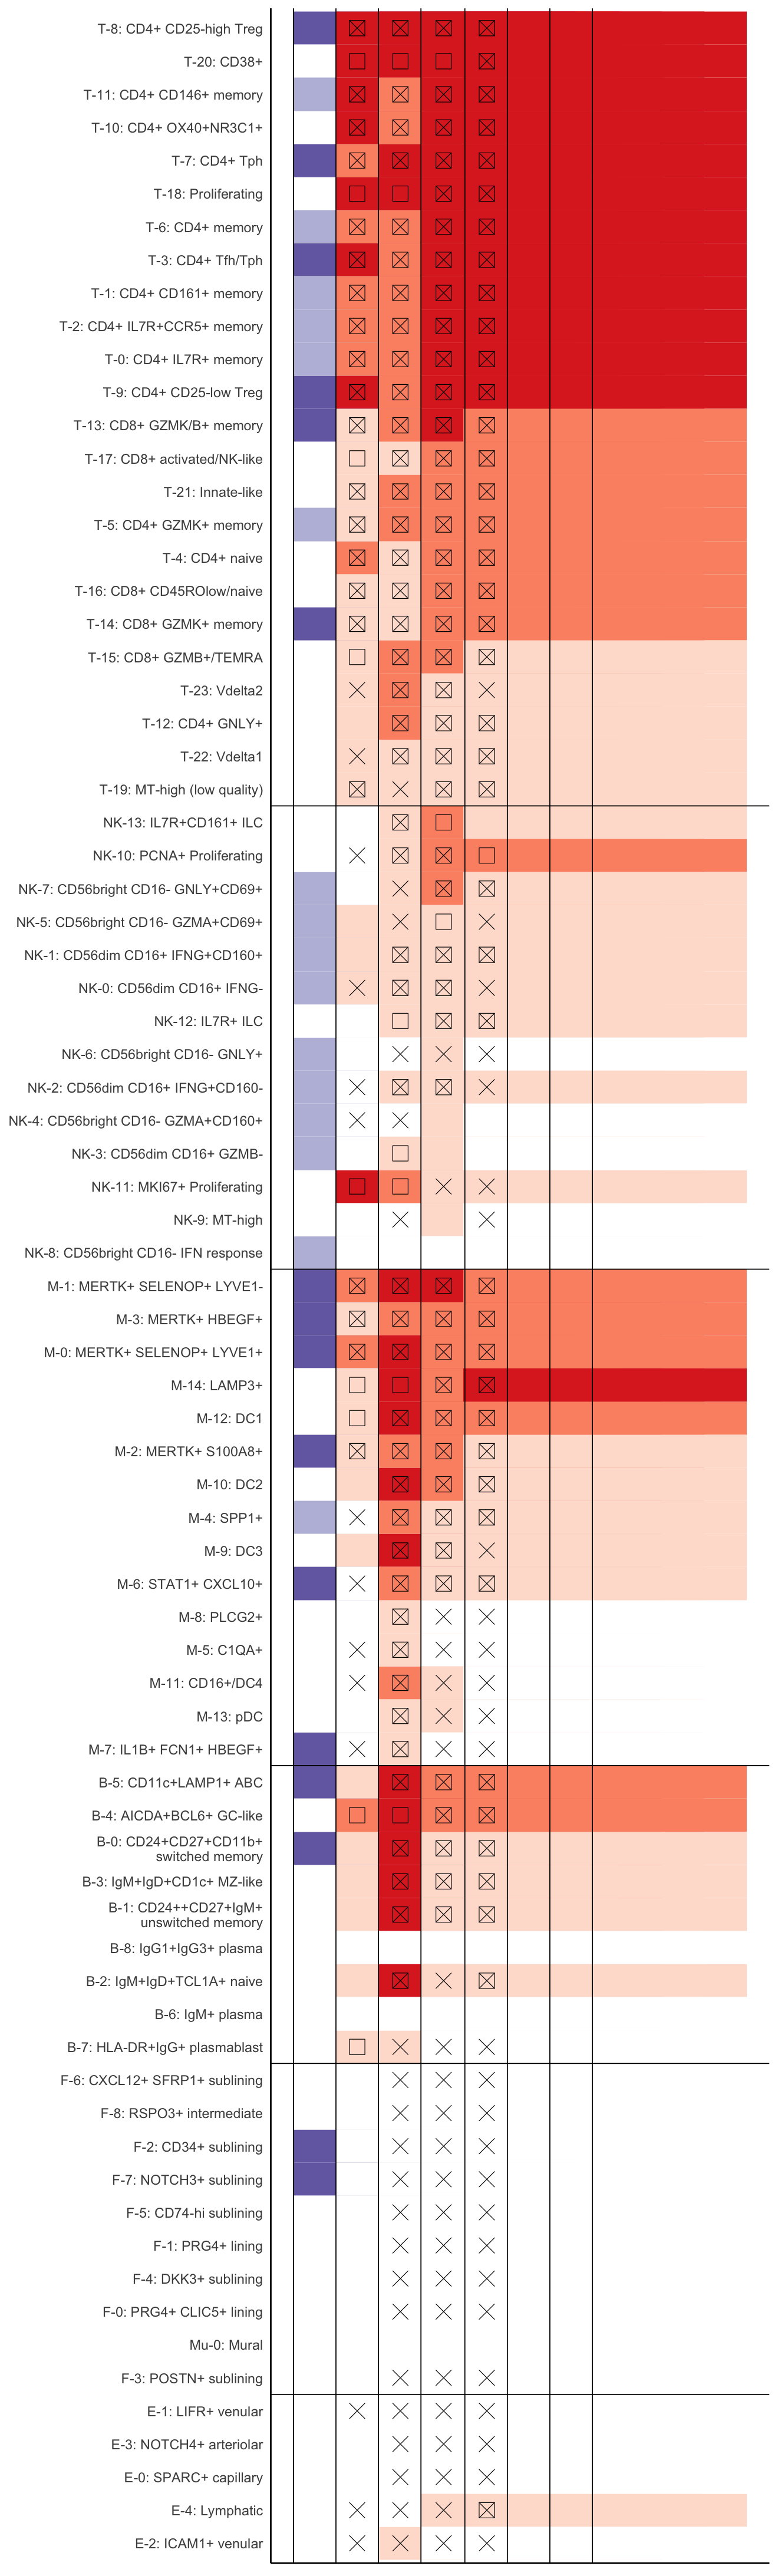

In [43]:

p1 <- 
# FUMA
    ggplot(clusters_fuma) + 
    geom_tile(data=clusters_fuma, aes(x=0, y=factor(group2, levels=ranked_cell_clusters), fill=factor(group2, levels=ranked_cell_clusters))) +
    scale_fill_manual(values=exp_colors_ra) + 
    new_scale("fill") +
# FUMA
    geom_tile(data=clusters_fuma, aes(x=0.15, y=factor(group2, levels=ranked_cell_clusters), fill=cut(assoc_mcz, breaks = c(-5, 1, 3, 5, 12)))) + 
     geom_point(data = clusters_fuma[clusters_fuma$assoc_mcp < 0.05,], aes(x=-0.275, y=group2), size=7, color='black', shape=0) + 
    geom_point(data = clusters_fuma[clusters_fuma$hetero_mcp < 0.05,], aes(x=-0.275, y=group2), size=7, color='black', shape=4) +
# FUMA+MAGMA10kb
geom_tile(data=clusters_fuma_mag, aes(x=0.3, y=factor(group2, levels=ranked_cell_clusters), fill=cut(assoc_mcz, breaks = c(-5, 1, 3, 5, 12)))) + 
     geom_point(data = clusters_fuma_mag[clusters_fuma_mag$assoc_mcp < 0.05,], aes(x=-0.1225, y=group2), size=7, color='black', shape=0) + 
    geom_point(data = clusters_fuma_mag[clusters_fuma_mag$hetero_mcp < 0.05,], aes(x=-0.1225, y=group2), size=7, color='black', shape=4) +
# 10kb
geom_tile(data=micro_10, aes(x=0.45, y=factor(group2, levels=ranked_cell_clusters), fill=cut(assoc_mcz, breaks = c(-5, 1, 3, 5, 12)))) + 
     geom_point(data = micro_10[micro_10$assoc_mcp < 0.05,], aes(x=0.03, y=group2), size=7, color='black', shape=0) + 
    geom_point(data = micro_10[micro_10$hetero_mcp < 0.05,], aes(x=0.03, y=group2), size=7, color='black', shape=4) +
# 100kb
geom_tile(data=micro_100, aes(x=0.6, y=factor(group2, levels=ranked_cell_clusters), fill=cut(assoc_mcz, breaks = c(-5, 1, 3, 5, 12)))) + 
     geom_point(data = micro_100[micro_100$assoc_mcp < 0.05,], aes(x=0.1825, y=group2), size=7, color='black', shape=0) + 
    geom_point(data = micro_100[micro_100$hetero_mcp < 0.05,], aes(x=0.1825, y=group2), size=7, color='black', shape=4) +
scale_fill_manual(values = c('white', '#fee0d2', "#fc9272", '#de2d26'),
                   limits = c('(-5,1]', '(1,3]', '(3,5]', '(5,12]'))  + labs(y="scDRS Zscore",x='',fill="Group Zscore") +




   

    geom_vline(xintercept=-0.35) + geom_vline(xintercept=-0.5) +geom_vline(xintercept=-0.2) +
    geom_vline(xintercept=-0.05) +geom_vline(xintercept=0.105) + geom_vline(xintercept=0.255) + geom_vline(xintercept=0.405) + 
geom_vline(xintercept=0.555) + 
 
    theme_classic(base_size =17.5) + 
    theme( 
           legend.position="none", axis.text.x = element_blank(),
          axis.title.y = element_blank(), axis.ticks.y = element_blank(), 
         axis.ticks.x = element_blank(), axis.title.x = element_blank()) +
 geom_hline(yintercept=5.5) + geom_hline(yintercept=15.5)+ geom_hline(yintercept=24.5)+ geom_hline(yintercept=39.5)+ geom_hline(yintercept=53.5) + 
labs(fill='Group\nZ_score') 

#0.473098330241187
#0.357142857142857
options(repr.plot.height = 0.473098330241187*nrow(micro_10), repr.plot.width =11)
cat("FUMA", "FUMA-MAG", "10kb", "100kb")
p1

In [ ]:
options(repr.plot.height = 0.473098330241187*nrow(micro_10), repr.plot.width =11)

In [46]:
pdf("./FUMA_MAG_comp.pdf", height=0.473098330241187*nrow(micro_10), 
    width=11)
print(p1)
dev.off()

pdf 
  2

## Compare Gene lists

In [54]:
fuma_genes <- fread("~/Desktop/SC_GWAS_Bench/output/MAGMA/RA_FUMA_Pval_05-12-23.tsv")
fuma_mag_genes <- fread("~/Desktop/SC_GWAS_Bench/output/MAGMA/RA_FUMA_MAGMA_Pval_05-11-23.tsv")
mag_10_genes <- fread("~/Desktop/SC_GWAS_Bench/output/MAGMA/step2RA/RA_1010_Pval_2023_06_13.tsv")
mag_10_genes2 <- fread("~/Downloads/RA_10kb_Pval_onlyinrna_nodups_07-09-23.tsv")
dim(fuma_genes)
dim(fuma_mag_genes)
dim(mag_10_genes)
dim(mag_10_genes2)

[1] 445   2

[1] 1000    2

[1] 18043     2

[1] 17032     2

In [60]:
length(intersect(fuma_genes$GENE, fuma_mag_genes$GENE))
length(intersect(fuma_genes$GENE, fuma_mag_genes$GENE))/length(fuma_genes$GENE)*100
length(intersect(fuma_genes$GENE, mag_10_genes2$GENE[1:1000]))
length(intersect(fuma_mag_genes$GENE, mag_10_genes2$GENE[1:1000]))
length(setdiff(fuma_genes$GENE, fuma_mag_genes$GENE))
length(intersect(fuma_genes$GENE, setdiff(fuma_mag_genes$GENE, mag_10_genes2$GENE[1:1000])))

[1] 289

[1] 64.94382

[1] 175

[1] 658

[1] 156

[1] 128

289 genes are found by both FUMA and MAGMA in the FUMA-MAGMA based analyses. This consists of 64% of the genes identified by FUMA non MAGMA based methods.
156 genes are uniquely found by FUMA and not either MAGMA-based analyses.
128 of the genes identified by FUMA-MAGMA are uniquely found by FUMA and not MAGMA.

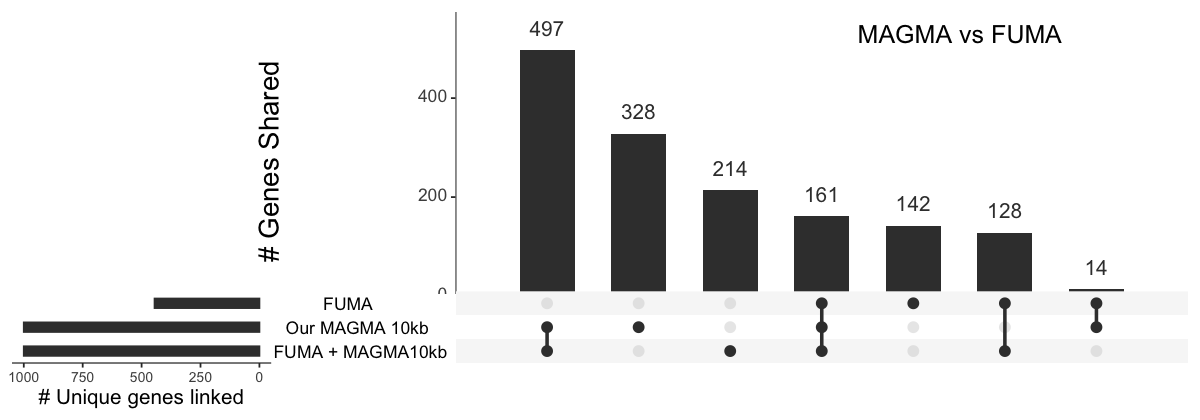

In [84]:
library(UpSetR)
library(grid)
options(repr.plot.height = 3.5, repr.plot.width =10 )
ListInput <- list("Our MAGMA 10kb" = mag_10_genes2$GENE[1:1000], 
                  "FUMA" = fuma_genes$GENE, 
                  "FUMA + MAGMA10kb" = fuma_mag_genes$GENE)
upset(fromList(ListInput), 
      order.by = "freq", keep.order=TRUE, sets.x.label= "# Unique genes linked", 
      point.size=3, line.size=1, 
      mainbar.y.label = "# Genes Shared", text.scale = c(2, 1.5, 1.5, 1.2, 1.5, 2))
grid.text("MAGMA vs FUMA",x = 0.8, y=0.92, gp=gpar(fontsize=15))

In [50]:
## Graph the p values
fuma_genes[1:2,]
fuma_mag_genes[1:2,]

GENE,RA
<chr>,<dbl>
PHTF1,3.75e-168
PTPN22,3.75e-168


GENE,RA
<chr>,<dbl>
TAP2,2.1071e-24
MICB,4.2199e-21


In [55]:
fuma_genes[fuma_genes$GENE %in% intersect(fuma_genes$GENE, fuma_mag_genes$GENE)[1:10],]
fuma_mag_genes[fuma_mag_genes$GENE %in% intersect(fuma_genes$GENE, fuma_mag_genes$GENE)[1:10],]
mag_10_genes2[mag_10_genes2$GENE %in%  intersect(fuma_genes$GENE, fuma_mag_genes$GENE)[1:10],]

GENE,RA
<chr>,<dbl>
PHTF1,3.75e-168
PTPN22,3.75e-168
AP4B1,3.75e-168
DCLRE1B,3.75e-168
MAGI3,8.80e-168
RSBN1,8.80e-168
HSD17B8,2.49e-120
RING1,2.49e-120
KIFC1,2.09e-111


GENE,RA
<chr>,<dbl>
MAGI3,2.2851e-20
PHTF1,7.7716e-16
KIFC1,4.1078e-15
RING1,2.0817e-14
AP4B1,2.3370e-14
RSBN1,4.5852e-14
PHF1,5.6011e-14
HSD17B8,8.2045e-14
PTPN22,3.0247e-12


GENE,RA
<chr>,<dbl>
MAGI3,6.2135e-15
AP4B1,1.4988e-14
DCLRE1B,1.5971e-13
PHTF1,5.0000e-10
RSBN1,5.0000e-10
PTPN22,5.0000e-10
PHF1,8.2990e-01


In [76]:
dim(fuma_genes[fuma_genes$RA < 0.05,])
dim(fuma_genes[fuma_genes$RA < 5e-4,])
dim(fuma_genes[fuma_genes$RA < 5e-8,])
dim(fuma_genes[fuma_genes$RA < 5e-12,])
dim(fuma_genes[fuma_genes$RA < 5e-16,])

[1] 440   2

[1] 436   2

[1] 385   2

[1] 194   2

[1] 132   2

In [77]:
dim(fuma_mag_genes[fuma_mag_genes$RA < 0.05,])
dim(fuma_mag_genes[fuma_mag_genes$RA < 5e-4,])
dim(fuma_mag_genes[fuma_mag_genes$RA < 5e-8,])
dim(fuma_mag_genes[fuma_mag_genes$RA < 5e-12,])
dim(fuma_mag_genes[fuma_mag_genes$RA < 5e-16,])

[1] 1000    2

[1] 659   2

[1] 238   2

[1] 146   2

[1] 30  2

In [78]:
dim(mag_10_genes2[mag_10_genes2$RA < 0.05,])
dim(mag_10_genes2[mag_10_genes2$RA < 5e-4,])
dim(mag_10_genes2[mag_10_genes2$RA < 5e-8,])
dim(mag_10_genes2[mag_10_genes2$RA < 5e-12,])
dim(mag_10_genes2[mag_10_genes2$RA < 5e-16,])

[1] 2429    2

[1] 372   2

[1] 58  2

[1] 11  2

[1] 0 2

In [79]:
test <- mag_10_genes2[1:1000,]
dim(test[test$RA < 0.05,])
dim(test[test$RA < 5e-4,])
dim(test[test$RA < 5e-8,])
dim(test[test$RA < 5e-12,])
dim(test[test$RA < 5e-16,])

[1] 1000    2

[1] 371   2

[1] 58  2

[1] 11  2

[1] 0 2